## Mass conservation in Tracer Experiments CNTDIFF, 3DDIFF, NOGMREDI

This notebook explores the mass conservation properties of all the runs in experiments CNTDIFF, 3DDIFF, NOGMREDI. Water mass and tracer mass.

In [1]:
from math import *

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

%matplotlib inline

from MITgcmutils import rdmds

from netCDF4 import Dataset

import numpy as np

import os 

import pylab as pl

import scipy.io

import scipy as spy

import seaborn as sns

import sys

/home/kramosmu/anaconda/lib/python2.7/site-packages/mpl_toolkits/__init__.py:2: UserWarning: Module MITgcmutils was already imported from MITgcmutils/__init__.pyc, but /home/kramosmu/anaconda/lib/python2.7/site-packages/MITgcmutils-0.1.0-py2.7.egg is being added to sys.path
  __import__('pkg_resources').declare_namespace(__name__)


In [2]:
lib_path = os.path.abspath('../../Building_canyon/BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout 
import TransportTools_MITgcm as trt

In [13]:
def TotalTracerInDomain(Tr,MaskC,rA,hFacC,drF,tt,nx,dx):
    '''
    INPUT----------------------------------------------------------------------------------------------------------------
    Tr    : Array with concentration values for a tracer. Until this function is more general, this should be size 19x90x360x360
    MaskC : Land mask for tracer
    rA    : Area of cell faces at C points (360x360)
    fFacC : Fraction of open cell (90x360x360)
    drF   : Distance between cell faces (90)
    tt    : Time slice to calculate. Int 0<=tt<=19
    nx    : x dimension (along shelf) 
    dx    : 
    OUTPUT----------------------------------------------------------------------------------------------------------------
    TrX = (1) Total mass of a tracer Tr in the whole domain at time tt. 
                                                
    -----------------------------------------------------------------------------------------------------------------------
    '''
    hFacCSwap = np.swapaxes(hFacC, 0, 2)
    
    TrMask=np.ma.array(Tr[tt,:,:,:],mask=MaskC[:,:,:])
    VolX = (np.swapaxes(hFacCSwap[:,:,:]*drF[:],0,2))*rA[:,:]
          
    TrX= np.sum((VolX*TrMask[:,:,:]*1000.0)) #[1 umol/l=1000 umol/m^3]
     
    return(TrX)
            

In [4]:
# General input
nx = 360
ny = 360
nz = 90
nt = 19 # t dimension size 

Bs = 7.4E-4 # ppt^-1
At = 2.0E-4 # K^-1

## 3DDIFF experiment

In [6]:
# run01
stateFile1='/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run01/stateGlob.nc'
StateOut1 = Dataset(stateFile1)

gridFile='/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run01/gridGlob.nc'
GridOut = Dataset(gridFile)

ptracersFile1='/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run01/ptracersGlob.nc'
PtracersOut1 = Dataset(ptracersFile1)

#run02
stateFile2='/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run02/stateGlob.nc'
StateOut2 = Dataset(stateFile2)

ptracersFile2='/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run02/ptracersGlob.nc'
PtracersOut2 = Dataset(ptracersFile2)

#run03
stateFile3='/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run03/stateGlob.nc'
StateOut3 = Dataset(stateFile3)

ptracersFile3='/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run03/ptracersGlob.nc'
PtracersOut3 = Dataset(ptracersFile3)



In [7]:
z = StateOut1.variables['Z']
Time = StateOut1.variables['T']

xc = rout.getField(gridFile, 'XC') # x coords tracer cells
yc = rout.getField(gridFile, 'YC') # y coords tracer cells

drF = GridOut.variables['drF'] # vertical distance between faces
dxG = rout.getField(gridFile,'dxG')
bathy = rout.getField(gridFile, 'Depth')

rA = rout.getField(gridFile, 'rA') # area of cells (x-y)
hFacC = rout.getField(gridFile, 'HFacC')
MaskC = rout.getMask(gridFile,'HFacC') # same for 3 runs

In [8]:
Tr1Run01 = rout.getField(ptracersFile1,'Tr1') # [Tr#Run#] = mol/L = mol/dm^3
Tr1Run02 = rout.getField(ptracersFile2,'Tr1') 
Tr1Run03 = rout.getField(ptracersFile3,'Tr1') 

In [9]:
TotTr1 = np.empty(19)
TotTr2 = np.empty(19)
TotTr3 = np.empty(19)

for time in range(0,19,1):
    print(time)    

    TotTr1[time] = TotalTracerInDomain(Tr1Run01,MaskC,rA,hFacC,drF,time,nx,dxG)
    TotTr2[time] = TotalTracerInDomain(Tr1Run02,MaskC,rA,hFacC,drF,time,nx,dxG)
    TotTr3[time] = TotalTracerInDomain(Tr1Run03,MaskC,rA,hFacC,drF,time,nx,dxG)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


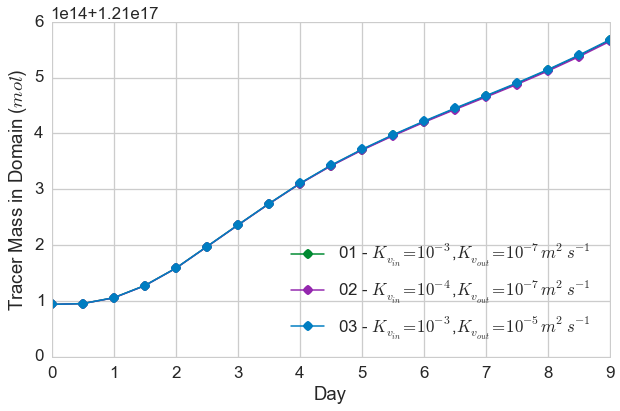

In [10]:
fig66=plt.figure(figsize=(10,6))
sns.set(context='talk', style='whitegrid', font='sans-serif', font_scale=1.3,rc={"lines.linewidth": 1.5})

times = np.arange(0,19,1)
gb = ['#008a31','#9428ae','#007dc1']
with sns.color_palette(gb):
        
    line1 = plt.plot(times/2.0,TotTr1,'o-', label='01 - $K_{v_{in}}=10^{-3}$,$K_{v_{out}}=10^{-7}m^2s^{-1}$ ')
    line2 = plt.plot(times/2.0,TotTr2,'o-', label='02 - $K_{v_{in}}=10^{-4}$,$K_{v_{out}}=10^{-7}m^2s^{-1}$')
    line3 = plt.plot(times/2.0,TotTr3,'o-', label='03 - $K_{v_{in}}=10^{-3}$,$K_{v_{out}}=10^{-5}m^2s^{-1}$')
        
    plt.ylabel('Tracer Mass in Domain ($mol$)')
    plt.xlabel('Day')
    plt.legend(loc = 0)
    

fig66.savefig('/ocean/kramosmu/Figures/TotalTracerInDomain3DDIFF.eps', format='eps', dpi=1000, bbox_inches='tight')


In [11]:
print 'Canyon case: The difference between initial tracer mass and final is ', TotTr1[18]-TotTr1[0], ' mol'

Canyon case: The difference between initial tracer mass and final is  4.73215197901e+14  mol


## CNTDIFF

In [12]:
# run04
stateFile4='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run04/stateGlob.nc'
StateOut4 = Dataset(stateFile4)

gridFile='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run04/gridGlob.nc'
GridOut = Dataset(gridFile)

ptracersFile4='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run04/ptracersGlob.nc'
PtracersOut4 = Dataset(ptracersFile4)

#run06
stateFile6='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run06/stateGlob.nc'
StateOut6 = Dataset(stateFile6)

ptracersFile6='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run06/ptracersGlob.nc'
PtracersOut6 = Dataset(ptracersFile6)

#run07
stateFile7='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run07/stateGlob.nc'
StateOut7 = Dataset(stateFile7)

ptracersFile7='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run07/ptracersGlob.nc'
PtracersOut7 = Dataset(ptracersFile7)

#run08
stateFile8='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run08/stateGlob.nc'
StateOut8 = Dataset(stateFile8)

ptracersFile8='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run08/ptracersGlob.nc'
PtracersOut8 = Dataset(ptracersFile8)

gridFileNoC='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run08/gridGlob.nc'
GridOutNoC = Dataset(gridFileNoC)



In [13]:
Time = StateOut4.variables['T']

xc = rout.getField(gridFile, 'XC') # x coords tracer cells
yc = rout.getField(gridFile, 'YC') # y coords tracer cells

drF = GridOut.variables['drF'] # vertical distance between faces
dxG = rout.getField(gridFile,'dxG')

rA = rout.getField(gridFile, 'rA') # area of cells (x-y)
hFacC = rout.getField(gridFile, 'HFacC')
MaskC = rout.getMask(gridFile,'HFacC') # same for 3 runs

drFNoC = GridOutNoC.variables['drF'] # vertical distance between faces
dxGNoC = rout.getField(gridFileNoC,'dxG')

rANoC = rout.getField(gridFileNoC, 'rA') # area of cells (x-y)
hFacCNoC = rout.getField(gridFileNoC, 'HFacC')
MaskCNoC = rout.getMask(gridFileNoC,'HFacC') # same for 3 runs

In [14]:
Tr1Run04 = rout.getField(ptracersFile4,'Tr1') # [Tr#Run#] = mol/L = mol/dm^3
Tr1Run06 = rout.getField(ptracersFile6,'Tr1') 
Tr1Run07 = rout.getField(ptracersFile7,'Tr1') # [Tr#Run#] = mol/L = mol/dm^3
Tr1Run08 = rout.getField(ptracersFile8,'Tr1') 


In [15]:
TotTr4 = np.empty(19)
TotTr6 = np.empty(19)
TotTr7 = np.empty(19)
TotTr8 = np.empty(19)

for time in range(0,19,1):
    print(time)    

    TotTr4[time] = TotalTracerInDomain(Tr1Run04,MaskC,rA,hFacC,drF,time,nx,dxG)
    TotTr6[time] = TotalTracerInDomain(Tr1Run06,MaskC,rA,hFacC,drF,time,nx,dxG)
    TotTr7[time] = TotalTracerInDomain(Tr1Run07,MaskCNoC,rANoC,hFacCNoC,drFNoC,time,nx,dxGNoC)
    TotTr8[time] = TotalTracerInDomain(Tr1Run08,MaskCNoC,rANoC,hFacCNoC,drFNoC,time,nx,dxGNoC)
  

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


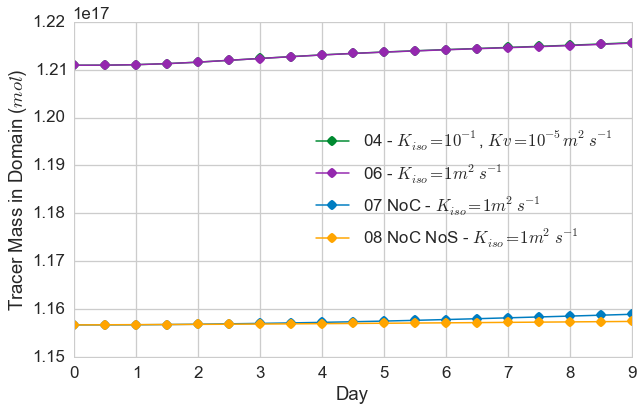

In [16]:
fig66=plt.figure(figsize=(10,6))
sns.set(context='talk', style='whitegrid', font='sans-serif', font_scale=1.3,rc={"lines.linewidth": 1.5})

times = np.arange(0,19,1)
gb = ['#008a31','#9428ae','#007dc1','orange']
with sns.color_palette(gb):
        
    line1 = plt.plot(times/2.0,TotTr4,'o-', label='04 - $K_{iso}=10^{-1}$, $Kv=10^{-5}m^2s^{-1}$ ')
    line2 = plt.plot(times/2.0,TotTr6,'o-', label='06 - $K_{iso}=1m^2s^{-1}$')
    line3 = plt.plot(times/2.0,TotTr7,'o-', label='07 NoC - $K_{iso}=1m^2s^{-1}$')
    line4 = plt.plot(times/2.0,TotTr8,'o-', label='08 NoC NoS - $K_{iso}=1m^2s^{-1}$')
        
    plt.ylabel('Tracer Mass in Domain ($mol$)')
    plt.xlabel('Day')
    plt.legend(loc = 0)
    

fig66.savefig('/ocean/kramosmu/Figures/TotalTracerInDomainCNTDIFFTr1.eps', format='eps', dpi=1000, bbox_inches='tight')


In [17]:
print 'Canyon case: The difference between initial tracer mass and final is ', TotTr4[18]-TotTr4[0], ' mol'

print 'No Canyon case: The difference between initial tracer mass and final is ', TotTr7[18]-TotTr7[0], ' mol'

print 'No Canyon case, no stratification: The difference between initial tracer mass and final is ', TotTr8[18]-TotTr8[0], ' mol'

Canyon case: The difference between initial tracer mass and final is  4.71667994452e+14  mol
No Canyon case: The difference between initial tracer mass and final is  2.21996892568e+14  mol
No Canyon case, no stratification: The difference between initial tracer mass and final is  7.26117144668e+13  mol


In [18]:
Tr1Run04 = rout.getField(ptracersFile4,'Tr3') # [Tr#Run#] = mol/L = mol/dm^3
Tr1Run06 = rout.getField(ptracersFile6,'Tr3') 
Tr1Run07 = rout.getField(ptracersFile7,'Tr3') # [Tr#Run#] = mol/L = mol/dm^3
Tr1Run08 = rout.getField(ptracersFile8,'Tr3') 


In [19]:
TotTr4 = np.empty(19)
TotTr6 = np.empty(19)
TotTr7 = np.empty(19)
TotTr8 = np.empty(19)

for time in range(0,19,1):
    print(time)    

    TotTr4[time] = TotalTracerInDomain(Tr1Run04,MaskC,rA,hFacC,drF,time,nx,dxG)
    TotTr6[time] = TotalTracerInDomain(Tr1Run06,MaskC,rA,hFacC,drF,time,nx,dxG)
    TotTr7[time] = TotalTracerInDomain(Tr1Run07,MaskCNoC,rANoC,hFacCNoC,drFNoC,time,nx,dxGNoC)
    TotTr8[time] = TotalTracerInDomain(Tr1Run08,MaskCNoC,rANoC,hFacCNoC,drFNoC,time,nx,dxGNoC)
  

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


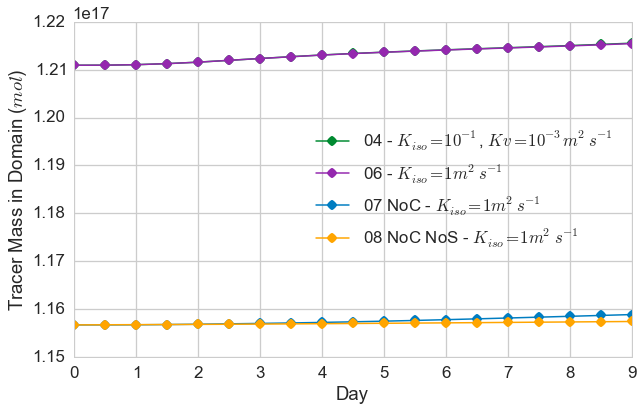

In [20]:
fig66=plt.figure(figsize=(10,6))
sns.set(context='talk', style='whitegrid', font='sans-serif', font_scale=1.3,rc={"lines.linewidth": 1.5})

times = np.arange(0,19,1)
gb = ['#008a31','#9428ae','#007dc1','orange']
with sns.color_palette(gb):
        
    line1 = plt.plot(times/2.0,TotTr4,'o-', label='04 - $K_{iso}=10^{-1}$, $Kv=10^{-3}m^2s^{-1}$ ')
    line2 = plt.plot(times/2.0,TotTr6,'o-', label='06 - $K_{iso}=1m^2s^{-1}$')
    line3 = plt.plot(times/2.0,TotTr7,'o-', label='07 NoC - $K_{iso}=1m^2s^{-1}$')
    line4 = plt.plot(times/2.0,TotTr8,'o-', label='08 NoC NoS - $K_{iso}=1m^2s^{-1}$')
        
    plt.ylabel('Tracer Mass in Domain ($mol$)')
    plt.xlabel('Day')
    plt.legend(loc = 0)
    

fig66.savefig('/ocean/kramosmu/Figures/TotalTracerInDomainCNTDIFFTr3.eps', format='eps', dpi=1000, bbox_inches='tight')


In [21]:
print 'Canyon case: The difference between initial tracer mass and final is ', TotTr4[18]-TotTr4[0], ' mol'

print 'No canyon case: The difference between initial tracer mass and final is ', TotTr7[18]-TotTr7[0], ' mol'

print 'No canyon case, no stratification: The difference between initial tracer mass and final is ', TotTr8[18]-TotTr8[0], ' mol'



Canyon case: The difference between initial tracer mass and final is  4.62044100138e+14  mol
No canyon case: The difference between initial tracer mass and final is  2.16122618433e+14  mol
No canyon case, no stratification: The difference between initial tracer mass and final is  7.13383404135e+13  mol


## NOGMREDI

In [22]:
# run01
stateFile1='/ocean/kramosmu/MITgcm/TracerExperiments/NOGMREDI/run01/stateGlob.nc'
StateOut1 = Dataset(stateFile1)

gridFile='/ocean/kramosmu/MITgcm/TracerExperiments/NOGMREDI/run01/gridGlob.nc'
GridOut = Dataset(gridFile)

ptracersFile1='/ocean/kramosmu/MITgcm/TracerExperiments/NOGMREDI/run01/ptracersGlob.nc'
PtracersOut1 = Dataset(ptracersFile1)

#run02
stateFile2='/ocean/kramosmu/MITgcm/TracerExperiments/NOGMREDI/run02/stateGlob.nc'
StateOut2 = Dataset(stateFile6)

ptracersFile2='/ocean/kramosmu/MITgcm/TracerExperiments/NOGMREDI/run02/ptracersGlob.nc'
PtracersOut2 = Dataset(ptracersFile2)

#run03
stateFile3='/ocean/kramosmu/MITgcm/TracerExperiments/NOGMREDI/run03/stateGlob.nc'
StateOut3 = Dataset(stateFile3)

ptracersFile3='/ocean/kramosmu/MITgcm/TracerExperiments/NOGMREDI/run03/ptracersGlob.nc'
PtracersOut3 = Dataset(ptracersFile3)

#run04
stateFile4='/ocean/kramosmu/MITgcm/TracerExperiments/NOGMREDI/run04/stateGlob.nc'
StateOut4 = Dataset(stateFile4)

ptracersFile4='/ocean/kramosmu/MITgcm/TracerExperiments/NOGMREDI/run04/ptracersGlob.nc'
PtracersOut4 = Dataset(ptracersFile4)

gridFileNoC='/ocean/kramosmu/MITgcm/TracerExperiments/NOGMREDI/run04/gridGlob.nc'
GridOutNoC = Dataset(gridFileNoC)



In [23]:
Time = StateOut4.variables['T']

xc = rout.getField(gridFile, 'XC') # x coords tracer cells
yc = rout.getField(gridFile, 'YC') # y coords tracer cells

drF = GridOut.variables['drF'] # vertical distance between faces
dxG = rout.getField(gridFile,'dxG')

rA = rout.getField(gridFile, 'rA') # area of cells (x-y)
hFacC = rout.getField(gridFile, 'HFacC')
MaskC = rout.getMask(gridFile,'HFacC') # same for 3 runs

drFNoC = GridOutNoC.variables['drF'] # vertical distance between faces
dxGNoC = rout.getField(gridFileNoC,'dxG')

rANoC = rout.getField(gridFileNoC, 'rA') # area of cells (x-y)
hFacCNoC = rout.getField(gridFileNoC, 'HFacC')
MaskCNoC = rout.getMask(gridFileNoC,'HFacC') # same for 3 runs

In [24]:
Tr1Run01 = rout.getField(ptracersFile1,'Tr1') # [Tr#Run#] = mol/L = mol/dm^3
Tr1Run02 = rout.getField(ptracersFile2,'Tr1') 
Tr1Run03 = rout.getField(ptracersFile3,'Tr1') # [Tr#Run#] = mol/L = mol/dm^3
Tr1Run04 = rout.getField(ptracersFile4,'Tr1') 


In [25]:
TotTr1 = np.empty(19)
TotTr2 = np.empty(19)
TotTr3 = np.empty(19)
TotTr4 = np.empty(19)

for time in range(0,19,1):
    print(time)    

    TotTr1[time] = TotalTracerInDomain(Tr1Run01,MaskC,rA,hFacC,drF,time,nx,dxG)
    TotTr2[time] = TotalTracerInDomain(Tr1Run02,MaskC,rA,hFacC,drF,time,nx,dxG)
    TotTr3[time] = TotalTracerInDomain(Tr1Run03,MaskC,rA,hFacC,drF,time,nx,dxG)
    TotTr4[time] = TotalTracerInDomain(Tr1Run04,MaskCNoC,rANoC,hFacCNoC,drFNoC,time,nx,dxGNoC)
  

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


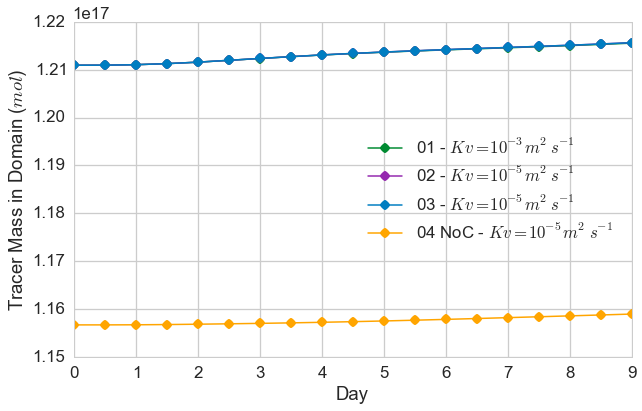

In [26]:
fig66=plt.figure(figsize=(10,6))
sns.set(context='talk', style='whitegrid', font='sans-serif', font_scale=1.3,rc={"lines.linewidth": 1.5})

times = np.arange(0,19,1)
gb = ['#008a31','#9428ae','#007dc1','orange']
with sns.color_palette(gb):
        
    line1 = plt.plot(times/2.0,TotTr1,'o-', label='01 - $Kv=10^{-3}m^2s^{-1}$ ')
    line2 = plt.plot(times/2.0,TotTr2,'o-', label='02 - $Kv=10^{-5}m^2s^{-1}$')
    line3 = plt.plot(times/2.0,TotTr3,'o-', label='03 - $Kv=10^{-5}m^2s^{-1}$')
    line4 = plt.plot(times/2.0,TotTr4,'o-', label='04 NoC - $Kv=10^{-5}m^2s^{-1}$ ')
        
    plt.ylabel('Tracer Mass in Domain ($mol$)')
    plt.xlabel('Day')
    plt.legend(loc = 0)
    

fig66.savefig('/ocean/kramosmu/Figures/TotalTracerInDomainNOGMREDITr1.eps', format='eps', dpi=1000, bbox_inches='tight')


All lines for canyon cases fall under the blue dots. They have the same values.


In [27]:
print 'Canyon case: The difference between initial tracer mass and final is ', TotTr1[18]-TotTr1[0], ' mol'

Canyon case: The difference between initial tracer mass and final is  4.62418685668e+14  mol


In [28]:
print 'No Canyon case: The difference between initial tracer mass and final is ', TotTr4[18]-TotTr4[0], ' mol'

No Canyon case: The difference between initial tracer mass and final is  2.26785283382e+14  mol


## Closed boundaries and periodic E-W NOGMREDI

In [20]:
# run01
stateFile5='/ocean/kramosmu/MITgcm/TracerExperiments/NOGMREDI/run05/stateGlob.nc'
StateOut5 = Dataset(stateFile5)
for dimobj in StateOut5.variables.values():
    print dimobj

gridFile='/ocean/kramosmu/MITgcm/TracerExperiments/NOGMREDI/run05/gridGlob.nc'
GridOut = Dataset(gridFile)
for dimobj in GridOut.variables.values():
    print dimobj
p
ptracersFile5='/ocean/kramosmu/MITgcm/TracerExperiments/NOGMREDI/run05/ptracersGlob.nc'
PtracersOut5 = Dataset(ptracersFile5)



<type 'netCDF4.Variable'>
float64 Xp1(Xp1)
    long_name: X-Coordinate of cell corner
    units: meters
unlimited dimensions: 
current shape = (361,)
filling off

<type 'netCDF4.Variable'>
float64 Y(Y)
    long_name: Y-Coordinate of cell center
    units: meters
unlimited dimensions: 
current shape = (360,)
filling off

<type 'netCDF4.Variable'>
float64 Z(Z)
    long_name: vertical coordinate of cell center
    units: meters
    positive: up
unlimited dimensions: 
current shape = (90,)
filling off

<type 'netCDF4.Variable'>
float64 X(X)
    long_name: X-coordinate of cell center
    units: meters
unlimited dimensions: 
current shape = (360,)
filling off

<type 'netCDF4.Variable'>
float64 Yp1(Yp1)
    long_name: Y-Coordinate of cell corner
    units: meters
unlimited dimensions: 
current shape = (361,)
filling off

<type 'netCDF4.Variable'>
float64 Zl(Zl)
    long_name: vertical coordinate of upper cell interface
    units: meters
    positive: up
unlimited dimensions: 
current shape = 

NameError: name 'p' is not defined

In [6]:
Time = StateOut5.variables['T']

xc = rout.getField(gridFile, 'XC') # x coords tracer cells
yc = rout.getField(gridFile, 'YC') # y coords tracer cells

drF = GridOut.variables['drF'] # vertical distance between faces
dxG = rout.getField(gridFile,'dxG')

rA = rout.getField(gridFile, 'rA') # area of cells (x-y)
hFacC = rout.getField(gridFile, 'HFacC')
MaskC = rout.getMask(gridFile,'HFacC') # same for 3 runs

Tr1Run05 = rout.getField(ptracersFile5,'Tr1') # [Tr#Run#] = mol/L = mol/dm^3


In [14]:
TotTr1 = np.empty(19)

for time in range(0,19,1):
    print(time)    

    TotTr1[time] = TotalTracerInDomain(Tr1Run05,MaskC,rA,hFacC,drF,time,nx,dxG)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


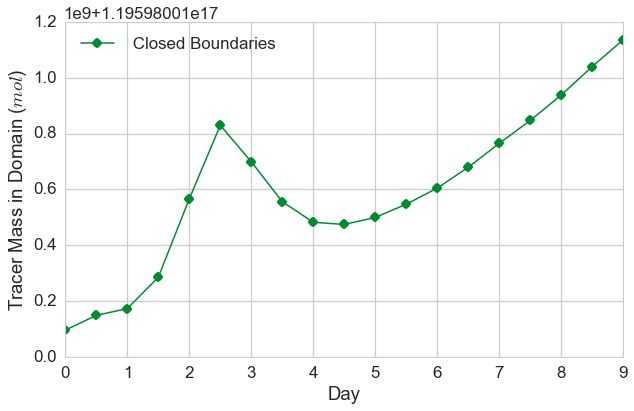

In [15]:
fig66=plt.figure(figsize=(10,6))
sns.set(context='talk', style='whitegrid', font='sans-serif', font_scale=1.3,rc={"lines.linewidth": 1.5})

times = np.arange(0,19,1)
gb = ['#008a31','#9428ae','#007dc1','orange']
with sns.color_palette(gb):
        
    line1 = plt.plot(times/2.0,TotTr1,'o-', label=' Closed Boundaries ')
       
    plt.ylabel('Tracer Mass in Domain ($mol$)')
    plt.xlabel('Day')
    plt.legend(loc = 0)
    

fig66.savefig('/ocean/kramosmu/Figures/TotalTracerInDomainNOGMREDIrun05.eps', format='eps', dpi=1000, bbox_inches='tight')


In [16]:
print 'Canyon case: The difference between initial tracer mass and final is ', TotTr1[18]-TotTr1[0], ' mol'

Canyon case: The difference between initial tracer mass and final is  1041090608.0  mol


In [18]:
budget = (3600*12)*(0.00000000e+00  + 2.81908773e+06  + 3.46710606e+06 +  2.69527912e+06+5.29448710e+06+
                    1.98373006e+06   +5.34428852e+05   +1.98832556e+06 -4.70618033e+04  -4.16101149e+05+
                    9.44357739e+05   +5.16473911e+05 +6.45859259e+05   +7.88403165e+05   +1.57099982e+05  
                    -1.27040283e+02 + 7.11652503e+05  + 6.33010029e+05  +  6.42566565e+05)
print(budget)

1.00909055415e+12
